# Первые графики и выводы

Работа аналитика — не только сами расчёты, но и поиск необычных явлений, артефактов и ошибок в данных. Помогают построение и анализ графиков: визуальное представление позволяет буквально заглянуть в данные, обнаружить проблемы и сделать выводы. Часто неожиданные. Такие непредвиденные открытия могут принести едва ли не больше пользы, чем решение первоначальной задачи.
Ваши цели:
•	научиться работать с инструментами для построения графиков: **hist(), boxplot(), plot();**

•	научиться делать срезы данных;

•	изучить метод **join()** для объединения таблиц и повторить метод **merge()**;

•	разобраться, как определять и интерпретировать взаимосвязи различных данных;

•	научиться автоматизировать процесс построения набора графиков.

## Знакомство с задачей

Как исследовать поведение водителей на заправках? Обратиться к статистике: узнать, на какую именно заправку заезжал водитель и сколько времени там провёл.

Ваши коллеги из  собрали необходимые данные и прислали их в таком виде:

•	Зашифрованное наименование сети АЗС (столбец name): вместо брендов — названия растений;

•	Уникальный идентификатор конкретной АЗС (столбец id) — в сети их много;

•	Время заезда на АЗС (столбец date_time) в формате ISO: 20190405T165358 означает, что водитель прибыл на заправку 5 апреля 2019 года в 16 часов 53 минуты 58 секунд по UTC.

•	Проведённое на АЗС время (столбец time_spent) в секундах.

Выведем первые строки таблицы методом head():

In [1]:
import pandas as pd
data = pd.read_csv('visits.csv')
print(data.head())

             date_time\tid\ttime_spent\tname
0   20180406T165358\t76144fb2\t98.0\tВасилек
1   20180404T173913\t76144fb2\t15.0\tВасилек
2  20180403T172824\t76144fb2\t220.0\tВасилек
3   20180407T070441\t76144fb2\t19.0\tВасилек
4   20180404T132049\t76144fb2\t14.0\tВасилек


Вот и первая проблема. 

Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате **csv**.

Напомним, что csv — это Comma-Separated Values, или значения, разделённые запятыми. Действительно, на прошлых занятиях вы работали с таблицами, где строку на колонки делили запятые. Однако вместо них могут быть точки с запятой, знаки табуляции или другие символы. Могут вносить путаницу и десятичные дроби, записанные с запятой.

Какими символами разделять колонки и дроби, указывают в параметрах функции **read_csv()**. Разделитель колонок задают параметром **sep** (от англ. separate, «отделять, разделять»), а дробей — параметром **decimal** (англ. «десятичная дробь»):

**file = pd.read_csv('file.csv', sep=';', decimal=',')**

Прочитайте файл **visits.csv**, указав как разделитель знак табуляции: '\t', и сохраните результат в датафрейме data. Выведите его первые пять строк.


In [4]:
data = pd.read_csv("visits.csv", sep = "\t")
data.head(5)


,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василек
1,20180404T173913,76144fb2,15.0,Василек
2,20180403T172824,76144fb2,220.0,Василек
3,20180407T070441,76144fb2,19.0,Василек
4,20180404T132049,76144fb2,14.0,Василек


## Сводные таблицы для расчёта среднего

Нужно узнать, сколько времени в среднем водители тратят на заправку в каждой сети АЗС. В каждой строке датафрейма есть название сети и время, проведённое на АЗС. Занимаясь предобработкой данных, вы применяли pivot_table() — метод для построения сводных таблиц.

Напомним его аргументы:

•	**index** — столбец, значения которого становятся названиями строк (индексом);

•	**columns** — столбец, значения которого становятся названиями столбцов;

•	**values** — значения, по которым вы хотите увидеть сводную таблицу;

•	**aggfunc** — функция, применяемая к значениям.

Прежде значением **aggfunc** вы указывали sum, то есть складывали элементы столбца. Если параметр **aggfunc** не указывать, то по умолчанию метод **pivot_table()** рассчитает среднее арифметическое значений, указанных в параметре **values**.

Посчитайте среднее время заправки в секундах ('**time_spent**') для каждой из сетей ('**name**'), применяя метод **pivot_table()**. Датафрейм сохраните в переменной **name_stat** и выведите на экран.


In [5]:
name_stat = data.pivot_table(index="name", values="time_spent")
name_stat

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042
Арктотис,73.879984
Астильба,376.143149
Бальзамин,134.508411
Бархатцы,145.300328
Бегония,163.200647
Белоцветник,100.818966


Сети АЗС «Нарцисс», «Арктотис» и «Малопа» имеют среднее время заправки около 70 секунд. Неправдоподобно мало.

В работе с данными почти всегда вас ждут сюрпризы

•	Почему-то выгрузили не те данные, или не всё, что есть;

•	Ошибки в алгоритмах, считающих заезды: скажем, время заправки учли неверно.

•	Не тот формат; например, вместо секунд записали минуты.

•	Упущен какой-нибудь существенный факт. Так, водители могли заехать на нерабочую АЗС (а счётчик их учёл) и развернуться, не заправившись (счётчик зафиксировал очень короткое время).

Словом, в данных может быть всё, что угодно. Именно вы как аналитик ручаетесь за их реалистичность. Попробуйте оценить, насколько они достоверны. Начните с базовых проверок. Например, несложно ответить на вопросы:

•	Сколько всего заездов зафиксировано за время исследования?

•	Сколько АЗС?

•	Сколько заездов на одну АЗС в день?

•	Какие сети АЗС самые популярные?

... и самостоятельно либо с помощью коллег оценить, похожи ли результаты ваших расчётов на правду.
Базовая проверка может обнаружить проблему в данных. Или наоборот — свидетельствовать, что с ними всё в порядке. По крайней мере, пока.

**Задача 1**. Сколько было заездов на АЗС? Сохраните число строк датафрейма в переменной **total_visits**. . Результат выведите на экран так:

Количество заездов: ... 


In [6]:
total_visits = data.shape[0]
print(f'Количество заездов: {total_visits}')

Количество заездов: 317104


**Задача 2**. Найдите количество охваченных исследованием АЗС. Сохраните его в переменной total_stations, результат на экран выведите так:

Количество АЗС: ... 

In [7]:
total_stations = len(data["name"].unique())
print(f'Количество АЗС: {total_stations}')

Количество АЗС: 45


**Задача 3**

Выведите на экран дату и время первого и последнего заезда на АЗС через пробел. Без объявления новых переменных, примените методы **min()** и **max()** к значениям столбца **data['date_time']** в аргументе функции **print()**.
Вывод должен выглядеть так: 20180402T000008 20180408T235957.


In [8]:
print(data["date_time"].min(), data["date_time"].max())

20180402T000008 20180408T235957


**Задача 4**
Данные собраны за 7 дней — сохраните это значение в переменной **total_days**.
Найдите среднее число заездов на одну АЗС за 1 день. Сохраните результат вычислений в переменной **station_visits_per_day** и выведите её на экран в следующем виде:

Количество заездов на АЗС в сутки: ... 


In [9]:
total_days = 7
station_visits_per_day = total_visits/total_days
print(f'Количество заездов на АЗС в сутки: {station_visits_per_day}')

Количество заездов на АЗС в сутки: 45300.57142857143


**Задача 5**

Проверьте распределение числа заездов по сетям АЗС. Распечатайте топ-10 сетей с наибольшим числом заездов, используя метод **sort_values**. В каждой строке должно быть название сети и число заездов.
Результат выведите в функции print().


In [11]:
stations = data.groupby("name").count().sort_values(by="date_time", ascending=False)
print(stations["date_time"].head(10))

name
Календула      85648
Василек        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: date_time, dtype: int64


# Гистограмма
На первый взгляд, данные выглядят корректно.

Однако есть гипотеза, что продолжительность заправки посчитана неверно: в некоторых сетях это время выглядит неправдоподобно маленьким. Напомним, вы считали среднее арифметическое. Оно не означает, что столько времени заправляются все водители: кто-то больше, кто-то меньше. Как представить себе значения, из которых рассчитано среднее, если в таблице тысячи строк? Не просматривать же каждую. Для ответа на этот вопрос строят гистограмму.

Гистограмма — это график, который показывает, как часто в наборе данных встречается то или иное значение. Гистограмма объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала. 


В Pandas гистограмму строит специальный метод **hist()** (от англ. histogram — «гистограмма»). Применять его можно к списку или к столбцу датафрейма: во втором случае название столбца передаётся в параметре. Метод **hist()** находит в наборе чисел минимальное и максимальное значения, а полученный диапазон делит на области или корзины. Затем **hist()** считает, сколько значений попало в каждую корзину, и отображает это на графике.
Параметр **bins** (англ. «корзины, вёдра») определяет, на сколько областей делить диапазон данных. По умолчанию таких «корзин» 10.

Построим гистограмму, отображающую количество шаров в боулинге. Допустим, у нас по одному шару каждого номера от 6 до 16:


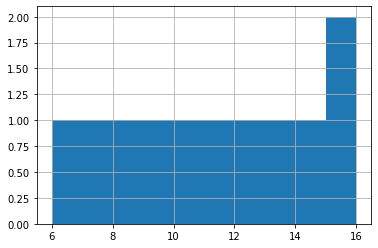

In [34]:
# строим гистограмму
pd.Series([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).hist()  


Хотя на каждый номер приходится 1 шар, гистограмма не похожа на прямоугольник. Это потому, что по умолчанию параметр **bins=10**, а шаров 11. Передадим соответствующее число корзин и взглянем на полученный график:

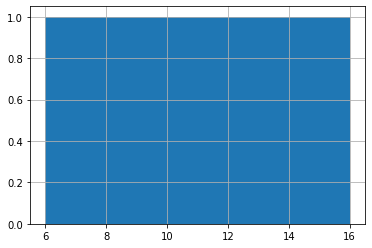

In [35]:
pd.Series([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).hist(bins=11) 

Теперь гистограмма соответствует действительности. Что если количество шаров с разными номерами изменится? Скажем, будет два шара под номером 8 и ни одной «семёрки»?

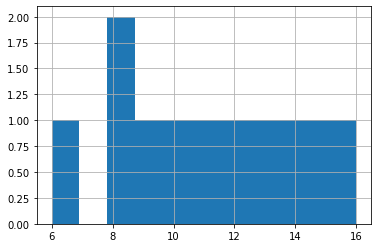

In [36]:
pd.Series([6, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16]).hist(bins=11) 

Провал там, где должно быть значение 7. Частота появления восьмёрки увеличилась вдвое. График выглядит правдоподобно.
Что произойдёт, если в данных шестнадцатый шар вдруг станет шаром под номером 100, а пятнадцатый пропадёт вовсе?

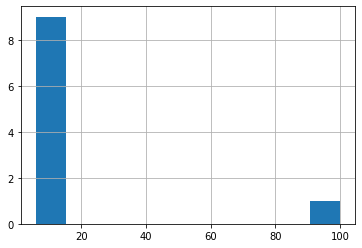

In [37]:
pd.Series([6, 8, 8, 9, 10, 11, 12, 13, 14, 100]).hist() # убрали параметр bins, так как шаров стало 10 

9 шаров со значениями в диапазоне от 5 до 15 и 1 шар с номером от 90 до 100. При таком изображении не видно тонких особенностей распределения значений в диапазоне от 5 до 15 — того, что в нём нет семёрки, а восьмёрок пара.
Вернём детальность, увеличив число корзин до 100.


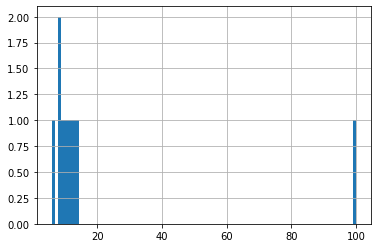

In [38]:
pd.Series([6, 8, 8, 9, 10, 11, 12, 13, 14, 100]).hist(bins=100) 

На этом графике видно, что восьмёрка удвоена, а семёрка не встречается вовсе. Увеличив число корзин, мы вернули детализацию, однако гистограмма всё ещё не наглядна. 100 слишком похоже на выброс — значение, сильно отличающееся от других элементов в наборе данных.
Изменим масштаб вручную, указав диапазон значений, по которым следует строить график. Границы интересующего нас интервала указывают в параметре range (англ. «диапазон»): **range=(min_value, max_value)**. Нам нужна область от 6 до 14:


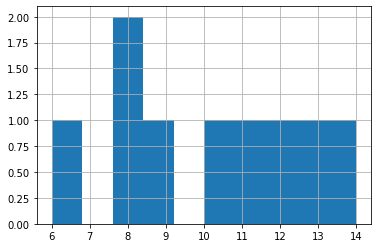

In [39]:
pd.Series([6, 8, 8, 9, 10, 11, 12, 13, 14, 100]).hist(range = (6, 14)) 

Гистограмма даёт представление о структуре данных. В частности, по ней можно понять, откуда взялось такое среднее арифметическое.
Вот 2 ряда по 10 чисел: их гистограммы очень разные, а среднее у обеих 5.

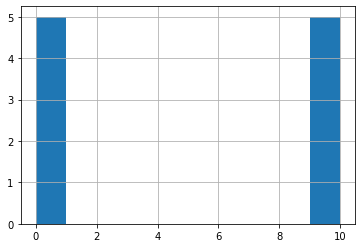

In [40]:
pd.Series([0, 0, 0, 0, 0, 10, 10, 10, 10, 10]).hist(range=(0, 10)) 

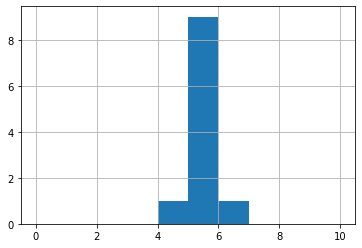

In [41]:
pd.Series([4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]).hist(range=(0, 10)) 

Если бы мы смотрели только на среднее значение этих наборов данных, то сказали бы, что они очень похожи. Однако описывающие их гистограммы дают понять, что это два очень разных явления.
Пора применить гистограмму к реальной задаче. Напомним, что средняя продолжительность заправки выглядит неправдоподобно малой.

**Задача 1**.
Выведите гистограмму значений времени, проведённого на АЗС (столбец data['time_spent']).

<Axes: >

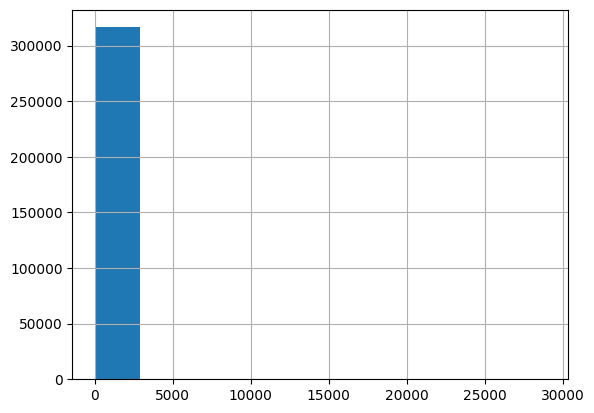

In [14]:
import matplotlib
data["time_spent"].hist()

**Задача 2**
Выведите гистограмму значений времени, проведённого на АЗС, с увеличенным до 100 числом столбцов

<Axes: >

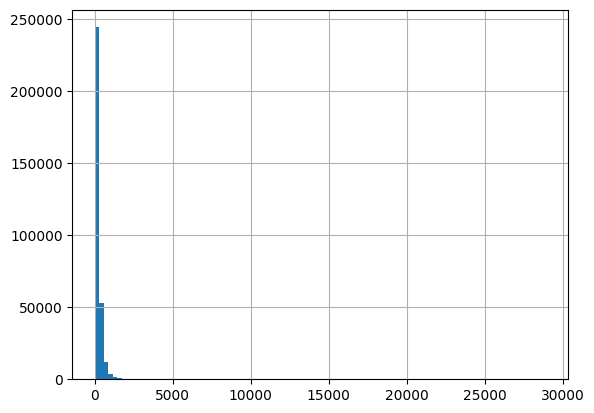

In [15]:
data["time_spent"].hist(bins=100)

**Задача 3**
Выведите гистограмму значений времени, проведённого на АЗС, с увеличенным до 100 числом столбцов и диапазоном значений от 0 до 1500.

<Axes: >

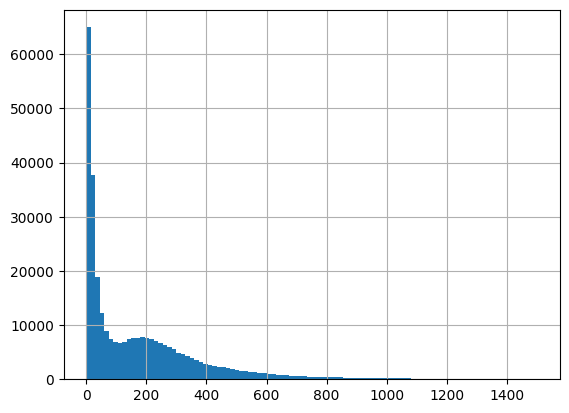

In [16]:
data["time_spent"].hist(bins=100, range=(0, 1500))

Ожидаемое распределение времени заправки — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого времени заправки. Однако на графике виден высокий пик около 0. Скорее всего, он имеет иную природу. Это не заправки, а ошибки расчётов, проезды сквозь АЗС или что-то ещё.